# TESTE Z COM UMA AMOSTRA

### Hipótese: média das notas do colégio X é igual a média do Estado de São Paulo

# 0.0 Importações

## 0.1 Bibliotecas

In [1]:
library(dplyr)
library(nortest) # teste de normalidade
library(BSDA) # teste Z


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'BSDA'

The following object is masked from 'package:datasets':

    Orange



## 0.2 Dataset

In [2]:
enem2019_tratado <- read.csv('data/enem2019_tratado.csv', sep=",")

In [3]:
# filtrando a escola

colegiox <- enem2019_tratado %>% filter(CO_ESCOLA=="35132287")

In [4]:
head(colegiox)

NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,CO_ESCOLA,TP_PRESENCA_CN,...,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
190001194936,São Paulo,18,F,1,1,3,1,35132287,1,...,597.4,491.0,0,1,160,140,140,160,160,760
190001607733,São Paulo,17,M,3,1,3,1,35132287,1,...,616.9,930.5,0,1,180,200,200,200,140,920
190001616799,São Paulo,17,F,1,1,3,1,35132287,1,...,601.9,663.9,0,1,160,140,160,200,120,780
190001799312,São Paulo,17,F,1,1,3,1,35132287,1,...,599.2,771.9,0,1,140,180,160,180,140,800
190001809044,São Paulo,18,F,1,1,3,1,35132287,1,...,627.7,663.1,0,1,160,200,200,200,200,960
190001809366,São Paulo,18,F,1,1,3,1,35132287,1,...,589.9,790.1,0,1,160,120,160,160,180,780


# 1.0 Descrição dos Dados

## 1.1 Tipagem e valores ausentes

In [5]:
# verificando os tipos dos dados

str(colegiox)

'data.frame':	130 obs. of  25 variables:
 $ NU_INSCRICAO           : num  1.9e+11 1.9e+11 1.9e+11 1.9e+11 1.9e+11 ...
 $ NO_MUNICIPIO_RESIDENCIA: Factor w/ 645 levels "Adamantina","Adolfo",..: 565 565 565 565 565 565 565 565 565 565 ...
 $ NU_IDADE               : int  18 17 17 17 18 18 18 17 17 17 ...
 $ TP_SEXO                : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 2 1 1 2 ...
 $ TP_COR_RACA            : int  1 3 1 1 1 1 1 2 4 1 ...
 $ TP_NACIONALIDADE       : int  1 1 1 1 1 1 1 2 1 1 ...
 $ TP_ESCOLA              : int  3 3 3 3 3 3 3 3 3 3 ...
 $ TP_ENSINO              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_ESCOLA              : int  35132287 35132287 35132287 35132287 35132287 35132287 35132287 35132287 35132287 35132287 ...
 $ TP_PRESENCA_CN         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TP_PRESENCA_CH         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TP_PRESENCA_LC         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TP_PRESENCA_MT         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NOTA_CN                : num  

In [6]:
# verificar valores missing

sapply(colegiox, function(x) sum(is.na(x)))

NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA                NU_IDADE 
                      0                       0                       0 
                TP_SEXO             TP_COR_RACA        TP_NACIONALIDADE 
                      0                       0                       0 
              TP_ESCOLA               TP_ENSINO               CO_ESCOLA 
                      0                       0                       0 
         TP_PRESENCA_CN          TP_PRESENCA_CH          TP_PRESENCA_LC 
                      0                       0                       0 
         TP_PRESENCA_MT                 NOTA_CN                 NOTA_CH 
                      0                       0                       0 
                NOTA_LC                 NOTA_MT               TP_LINGUA 
                      0                       0                       0 
      TP_STATUS_REDACAO              NOTA_COMP1              NOTA_COMP2 
                      0                       0                       0 
             NOTA_COMP3              NOTA_COMP4              NOTA_COMP5 
                      0                       0                       0 
           NOTA_REDACAO 
                      0

# 2.0 Testes Estatísticos

## 2.2 Teste de Normalidade

Nível de significância de 5%

- Ho = distribuição normal : p > 0.05
- Ha = distribuição não normal : p <= 0.05

#### Ciências Naturais

In [8]:
# shapiro-wilk

shapiro.test(colegiox$NOTA_CN)


	Shapiro-Wilk normality test

data:  colegiox$NOTA_CN
W = 0.98706, p-value = 0.2592


In [9]:
# anderson-darling

ad.test(colegiox$NOTA_CN)


	Anderson-Darling normality test

data:  colegiox$NOTA_CN
A = 0.43581, p-value = 0.2943


In [10]:
# lilliefors / kolmogorov-smirnov

lillie.test(colegiox$NOTA_CN)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  colegiox$NOTA_CN
D = 0.049973, p-value = 0.5918


In [11]:
# cramer-von mises

cvm.test(colegiox$NOTA_CN)


	Cramer-von Mises normality test

data:  colegiox$NOTA_CN
W = 0.060407, p-value = 0.3711


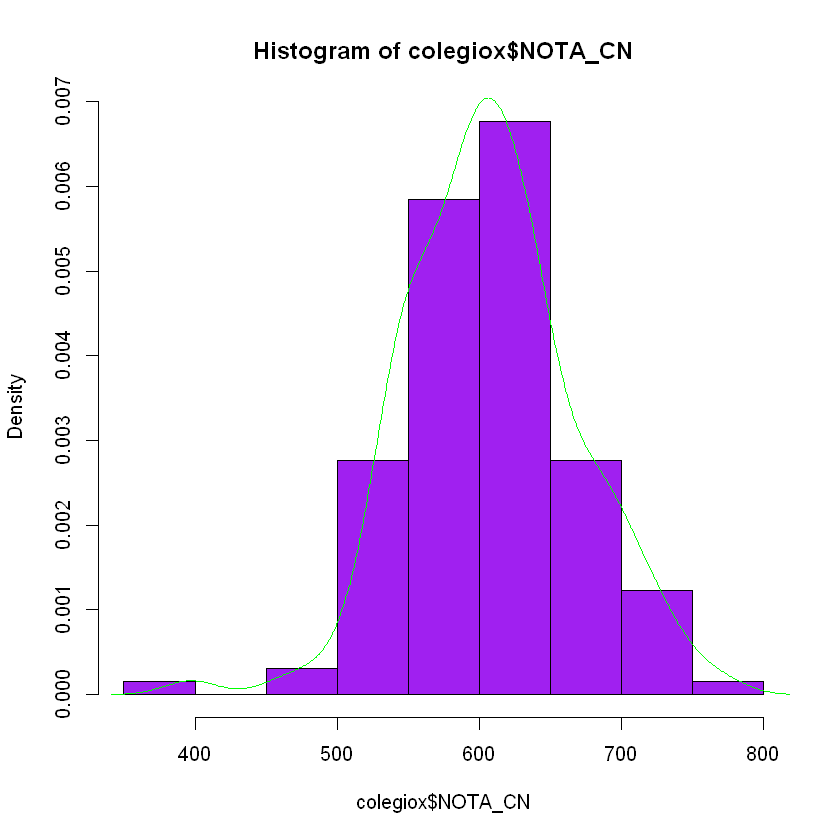

In [12]:
# histograma

hist(colegiox$NOTA_CN, probability=T, col="purple")
lines(density(colegiox$NOTA_CN), col="green")

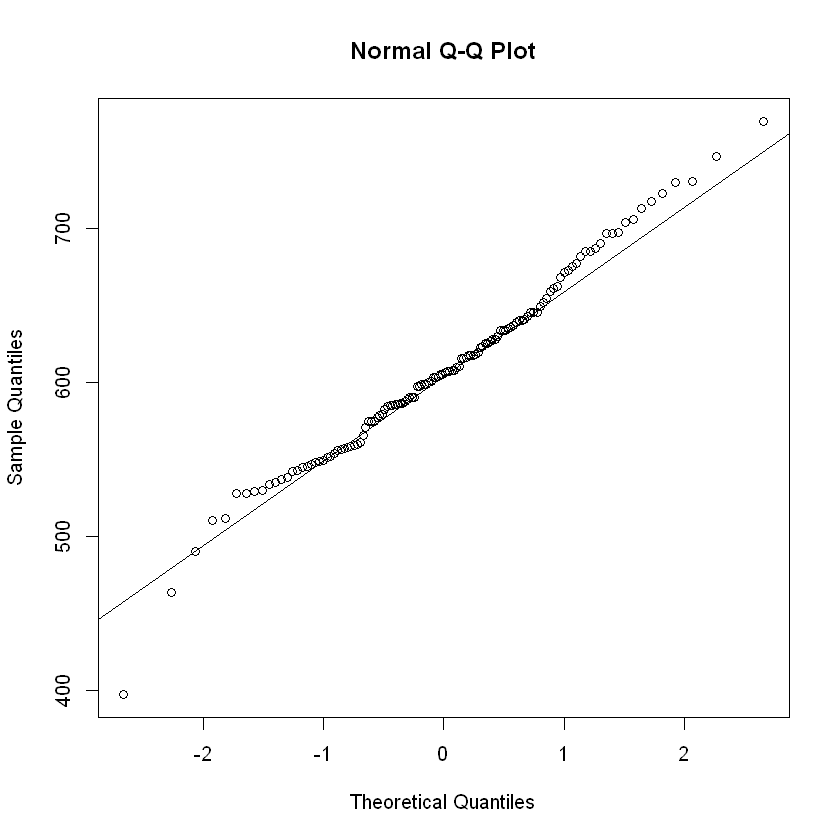

In [13]:
# QQplot

qqnorm(colegiox$NOTA_CN)
qqline(colegiox$NOTA_CN)

## 2.3 Teste Z

- Ho = média é igual a de São Paulo : p > 0.05
- Ha = média é diferente da de São Paulo : p <= 0.05

In [14]:
# média do estado de são paulo

summary(enem2019_tratado$NOTA_CN)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   432.8   491.0   494.5   551.6   860.9 

In [21]:
media  <-  mean(enem2019_tratado$NOTA_CN)

media

[1] 494.4807

In [22]:
# desvio padrão de são paulo

desvio <- sd(enem2019_tratado$NOTA_CN)

desvio

[1] 78.62276

Como é uma comparação de igualdade, o teste é bicaudal.

In [20]:
z.test(colegiox$NOTA_CN, mu=media, sigma.x = desvio, alternative="two.sided")


	One-sample z-Test

data:  colegiox$NOTA_CN
z = 16.486, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 494.4807
95 percent confidence interval:
 594.6486 621.6791
sample estimates:
mean of x 
 608.1638 


### Conclusão

A um nível de confiança de 95%, as evidências indicam que a média do colégio X é diferente da média do estado de São Paulo.